In [1]:
from lrgsglib.core import *
move_to_rootf()

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


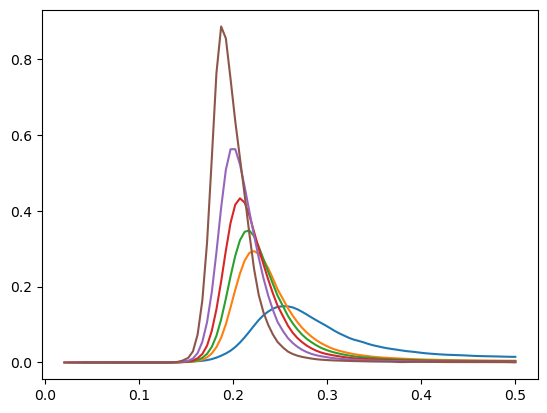

In [56]:
arrmax = []
for size in [5, 10, 12, 15, 20, 30]:
    l = Lattice3D(size, sgpath="cluster_data/tmp3d/", pflip=0.2)
    test = np.loadtxt(l.phtrapath + "full.txt")
    test = sort_array_by_column(test, 1)
    p = test[:, 1]
    chi = gaussian_filter(np.sqrt(l.N)*test[:, 5], sigma=1)
    plt.plot(p, chi, "-")
    arrmax.append([l.N, p[np.argmax(chi)]])
    # plist = extract_and_sort_values(l.phtrapath, r"p=([\d.]+)")
    # for p in plist:
    #     fname = find_matching_files(l.phtrapath, f"ordParam_p={p:.3g}_")
    #     na = int(extract_value_from_filename(fname, r"na=([\d.]+)"))
    #     np(f"ordParam_p={p:.3g}_rand_na={na:d}_float32.txt")


In [57]:
l.flip_random_fract_edges()
l.compute_k_eigvV(typf=np.float32)

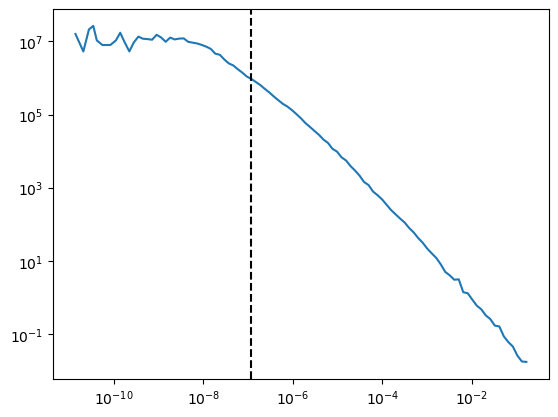

In [70]:
x, pdf = powerlaw.pdf(np.abs(l.eigV[0]))
plt.loglog(x[1:], pdf)
plt.axvline(x=np.finfo(np.float32).eps, color="k", linestyle="--")

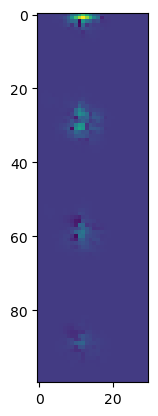

In [63]:
plt.imshow(l.eigV[0].reshape(900, 30)[:100, :30])

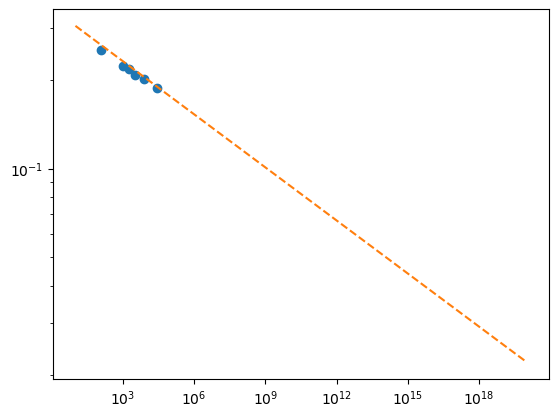

In [42]:
arrmax = np.array(arrmax)
plt.loglog(arrmax[:, 0], arrmax[:, 1], 'o')
x = np.logspace(1, 20)
plt.loglog(x, .35*x**-.06, '--')

In [5]:
test = sort_array_by_column(test, 1)

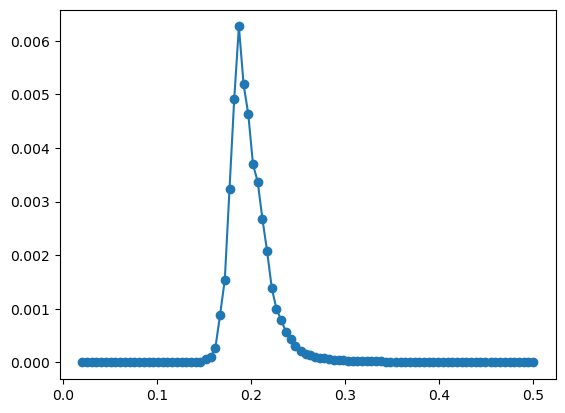

In [9]:
plt.plot(test[:, 1], test[:, 5], "o-")

In [14]:
l = Lattice3D(10, sgpath="cluster_data/tmp3d/")
flist = extract_and_sort_values(l.phtrapath, r"p=([\d.]+)")

In [15]:
flist

array([0.0354, 0.0505, 0.0556, 0.0606, 0.0657, 0.0707, 0.0758, 0.0808,
       0.0859, 0.0909, 0.096 , 0.101 , 0.106 , 0.111 , 0.116 , 0.121 ,
       0.126 , 0.131 , 0.136 , 0.141 , 0.146 , 0.152 , 0.157 , 0.162 ,
       0.167 , 0.172 , 0.177 , 0.182 , 0.187 , 0.192 , 0.197 , 0.202 ,
       0.207 , 0.212 , 0.217 , 0.222 , 0.227 , 0.232 , 0.237 , 0.242 ,
       0.247 , 0.253 , 0.258 , 0.263 , 0.268 , 0.273 , 0.278 , 0.283 ,
       0.288 , 0.293 , 0.298 , 0.303 , 0.308 , 0.313 , 0.318 , 0.323 ,
       0.328 , 0.333 , 0.338 , 0.343 , 0.348 , 0.354 , 0.359 , 0.364 ,
       0.369 , 0.374 , 0.379 , 0.384 , 0.389 , 0.394 , 0.399 , 0.404 ,
       0.409 , 0.414 , 0.419 , 0.424 , 0.429 , 0.434 , 0.439 , 0.444 ,
       0.449 , 0.455 , 0.46  , 0.465 , 0.47  , 0.475 , 0.48  , 0.485 ,
       0.49  , 0.495 , 0.5   ])